### Import Libraries

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import and Merge Datases

#### Cab Dataset:

In [322]:
Cab = pd.read_csv('/Users/muneraalrajhi/Desktop/Data Glacier Internship /DG-DataSets/Cab_Data.csv')
Cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [381]:
Cab.shape

(359392, 7)

In [323]:
Cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [324]:
## Changing the datatype of Date of Travel and Transaction ID
a = Cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
Cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

Cab['Transaction ID']= Cab['Transaction ID'].astype(str)

#### City Dataset:

In [325]:
city = pd.read_csv('/Users/muneraalrajhi/Desktop/Data Glacier Internship /DG-DataSets/City.csv')
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [382]:
city.shape

(20, 3)

In [326]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [327]:
## Changing the datatype of Population and Users
city['Population']= [x.replace(',','') for x in city['Population']] 
city['Population'] = city['Population'].astype(float)

city['Users'] = [x.replace(',','') for x in city['Users']]
city['Users'] = city['Users'].astype(float)

#### Customer ID Dataset

In [328]:
Customer_Id = pd.read_csv('/Users/muneraalrajhi/Desktop/Data Glacier Internship /DG-DataSets/Customer_ID.csv')
Customer_Id.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [383]:
Customer_Id.shape

(49171, 4)

In [329]:
Customer_Id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [330]:
# Changing the datatype of Income (USD/Month), Customer ID and Age
Customer_Id['Income (USD/Month)'] = Customer_Id['Income (USD/Month)'].astype(float)
Customer_Id['Customer ID']=Customer_Id['Customer ID'].astype(str)
Customer_Id['Age']=Customer_Id['Age'].astype(str)

#### Transaction ID Dataset


In [331]:
Transaction_ID = pd.read_csv('/Users/muneraalrajhi/Desktop/Data Glacier Internship /DG-DataSets/Transaction_ID.csv')
Transaction_ID.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [384]:
Transaction_ID.shape

(440098, 3)

In [332]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [333]:
# Changing the datatype of Transaction ID and Customer ID 
Transaction_ID['Transaction ID'] = Transaction_ID['Transaction ID'].astype(str)
Transaction_ID['Customer ID'] = Transaction_ID['Customer ID'].astype(str)

### Mergeing Files

In [334]:
main_df = Cab.merge(Transaction_ID, on= 'Transaction ID').merge(Customer_Id, on ='Customer ID').merge(city, on = 'City')

### EDA

In [335]:
main_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885.0,24701.0


In [336]:
main_df.shape

(359392, 14)

In [337]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  object        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  object        
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  object        
 11  Income (USD/Month)  359392 non-null  float64       
 12  Population          359392 non-null  float64       
 13  Users               359392 no

In [338]:
main_df.duplicated().sum()

0

In [339]:
main_df.isnull().sum().sum()

0

In [340]:
main_df.describe().round(2)

,KM Travelled,Price Charged,Cost of Trip,Income (USD/Month),Population,Users
count,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
mean,22.57,423.44,286.19,15048.82,3132198.04,158365.58
std,12.23,274.38,157.99,7969.41,3315194.39,100850.05
min,1.90,15.60,19.00,2000.00,248968.00,3643.00
25%,12.00,206.44,151.20,8424.00,671238.00,80021.00
50%,22.44,386.36,282.48,14685.00,1595037.00,144132.00
75%,32.96,583.66,413.68,21035.00,8405837.00,302149.00
max,48.00,2048.03,691.20,35000.00,8405837.00,302149.00


In [341]:
main_df.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                19
Users                     19
dtype: int64

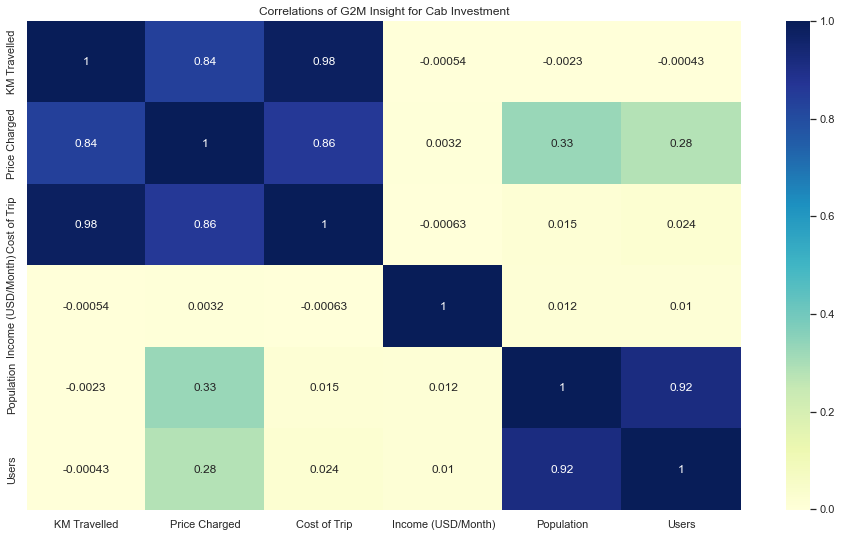

In [342]:
# Create list of Factors
factors = ['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled','Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode','Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users']

# Find the Correlations between the factors.
corr_matrix=main_df[factors].corr()

# Create a Chart for the Factors Correlations
plt.figure(figsize = (16, 9))
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.title(('Correlations of G2M Insight for Cab Investment'));

First Impression:
- There's a strong correlation between the Cost of the Price Charged and both KM Travelled and the Cost of Trip.
- There's a strong correlation between the number of Users and Population.

### Data Analysis and Investigation

##### What company do users prefer to use more?

In [343]:
# Count the frequency of each value in the Company column
Company_freq=main_df.groupby('Company').size()
print(Company_freq)

Company
Pink Cab       84711
Yellow Cab    274681
dtype: int64


In [344]:
# Calculate The Company Frequency Percentage
main_df['Company'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

Yellow Cab    76.43%
Pink Cab      23.57%
Name: Company, dtype: object

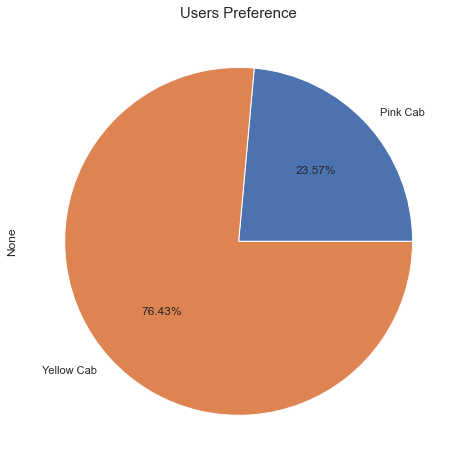

In [345]:
#The Company Frequency Percentage Chart
Company_freq.plot(kind="pie",figsize=(8,8),autopct="%1.2f%%")
plt.title('Users Preference',fontsize=15);

76.43% of the users prefer Yellow Cab over Pink Cab

#### Which company charges more?

In [346]:
main_df.groupby('Company')['Price Charged'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,310.800856,181.995661,15.60,159.97,298.06,441.505,1623.48
Yellow Cab,274681.0,458.181990,288.386166,20.73,226.68,425.06,633.880,2048.03


/Users/muneraalrajhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


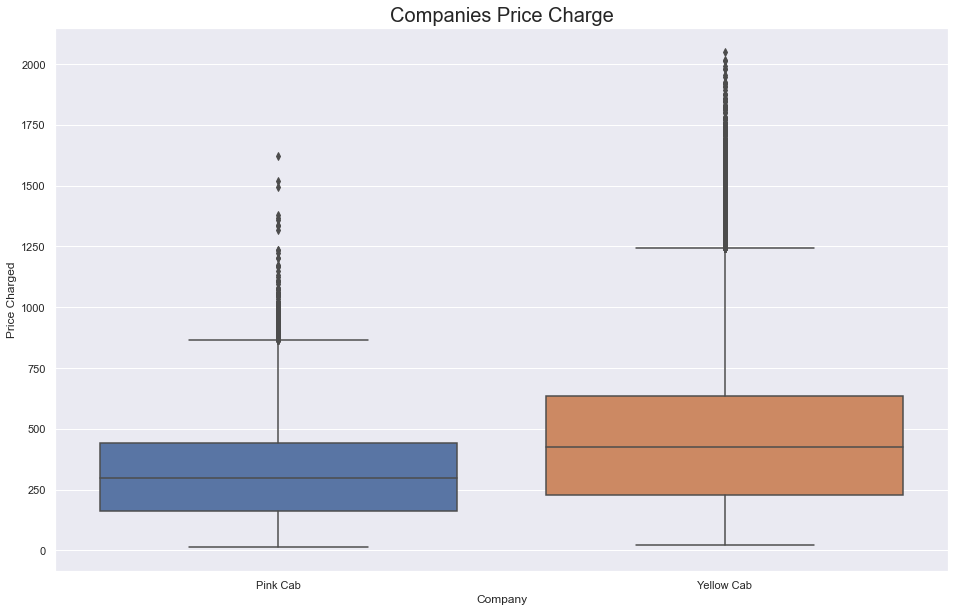

In [347]:
plt.figure(figsize = (16, 10))
plt.title('Companies Price Charge', fontsize=20)
sns.boxplot(main_df['Company'], main_df['Price Charged'])

plt.show()

Yellow Cab charges an average of 458$ per ride 
Pink Cab charges an average of 310$ per ride


#### Which payment method is most used?

In [348]:
payment= main_df.groupby(['Company','Payment_Mode'])
payment  = payment['Customer ID'].nunique()
print(payment)

Company     Payment_Mode
Pink Cab    Card            25276
            Cash            19952
Yellow Cab  Card            33724
            Cash            29089
Name: Customer ID, dtype: int64


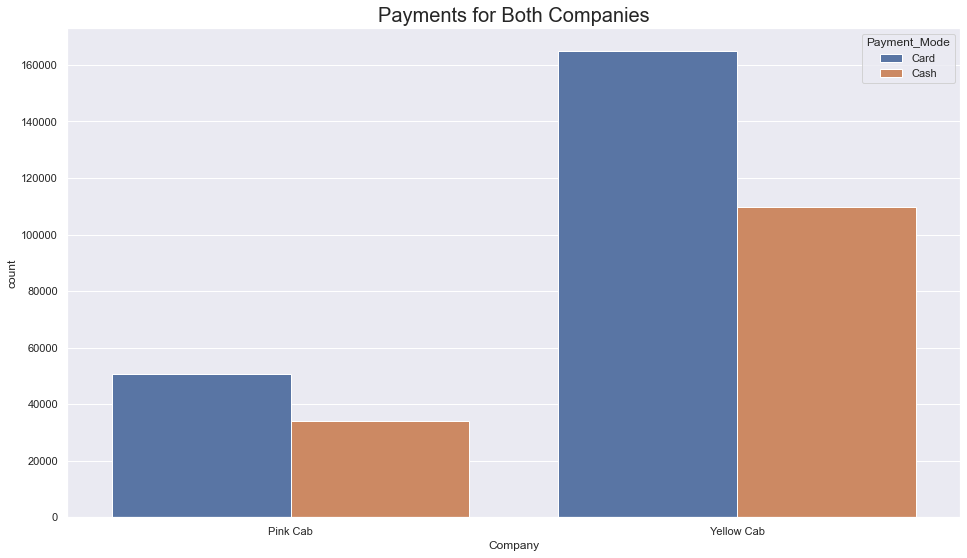

In [349]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=main_df)
plt.title('Payments for Both Companies', fontsize=20)
plt.show()

In both companies users prefer to pay using cards rather than cash

#### What is gender distribution among companies?

In [350]:
gender = main_df.groupby(['Company','Gender'])
gender = gender['Customer ID'].nunique()
print(gender)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


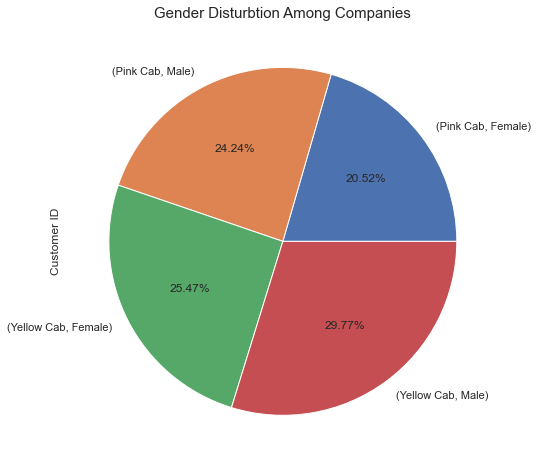

In [351]:
gender.plot(kind="pie",figsize=(8,8),autopct="%1.2f%%")
plt.title('Gender Disturbtion Among Companies',fontsize=15);

Males represent 54% of users, and 29.77% of Male prefer to ride Yellow Cab while Pink Cab scores the lowest Female users present with only 20.52%.

#### What is the average income based on gender

In [352]:
main_df.groupby('Gender')['Income (USD/Month)'].mean().round(2)

Gender
Female    15057.97
Male      15042.01
Name: Income (USD/Month), dtype: float64

/Users/muneraalrajhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


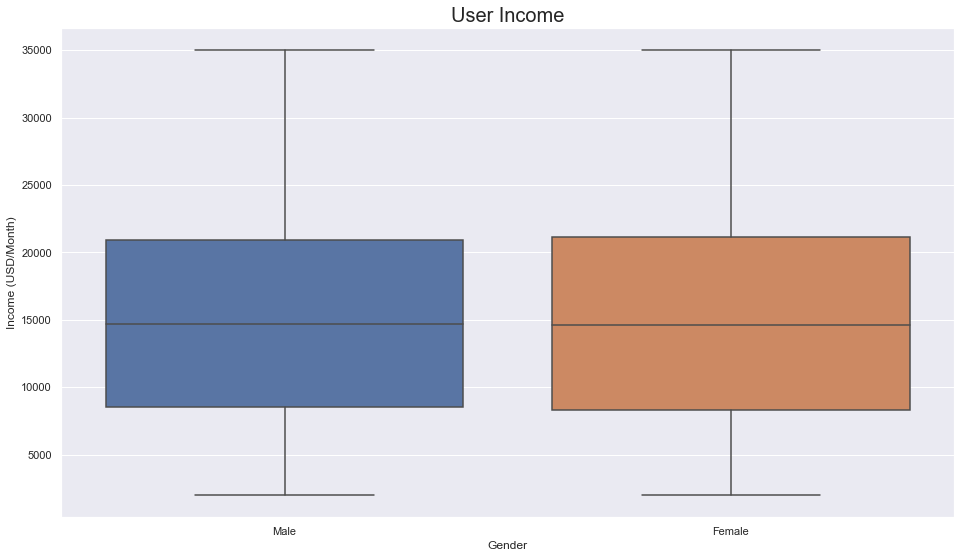

In [353]:
plt.figure(figsize = (16, 9))

sns.boxplot(main_df['Gender'], main_df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

The average income for both genders is 15K$

#### What is the average ride in KM?

In [358]:
main_df.groupby('Company')['KM Travelled'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,22.559917,12.231092,1.9,12.00,22.44,32.96,48.0
Yellow Cab,274681.0,22.569517,12.234298,1.9,11.99,22.44,32.96,48.0


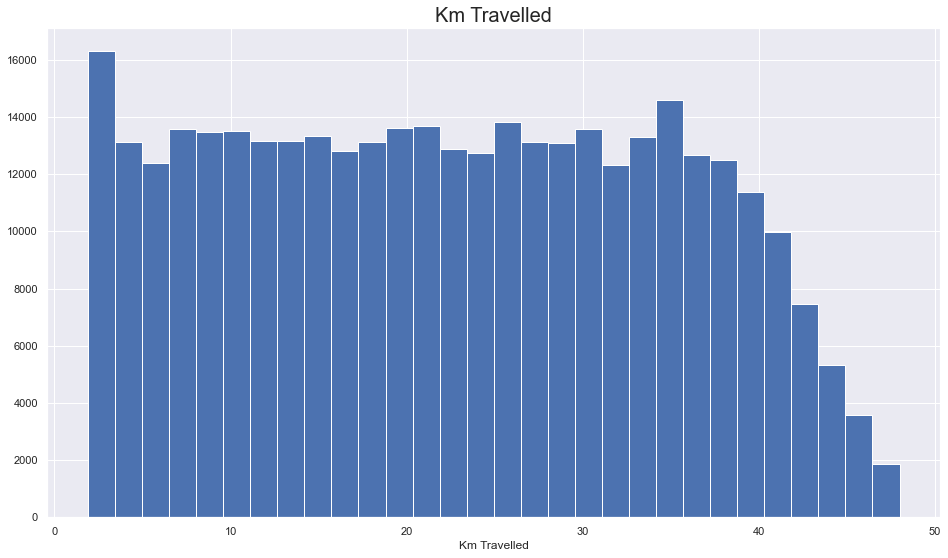

In [359]:
plt.figure(figsize = (16, 9))
plt.hist(main_df['KM Travelled'], bins = 30)
plt.title('Km Travelled', fontsize=20)
plt.xlabel('Km Travelled')
plt.show()

most rides take from 22 KM to 48 KM

#### What is the Profit Margin?

Profit Margin:
 Company
Pink Cab       62.65
Yellow Cab    160.26
dtype: float64


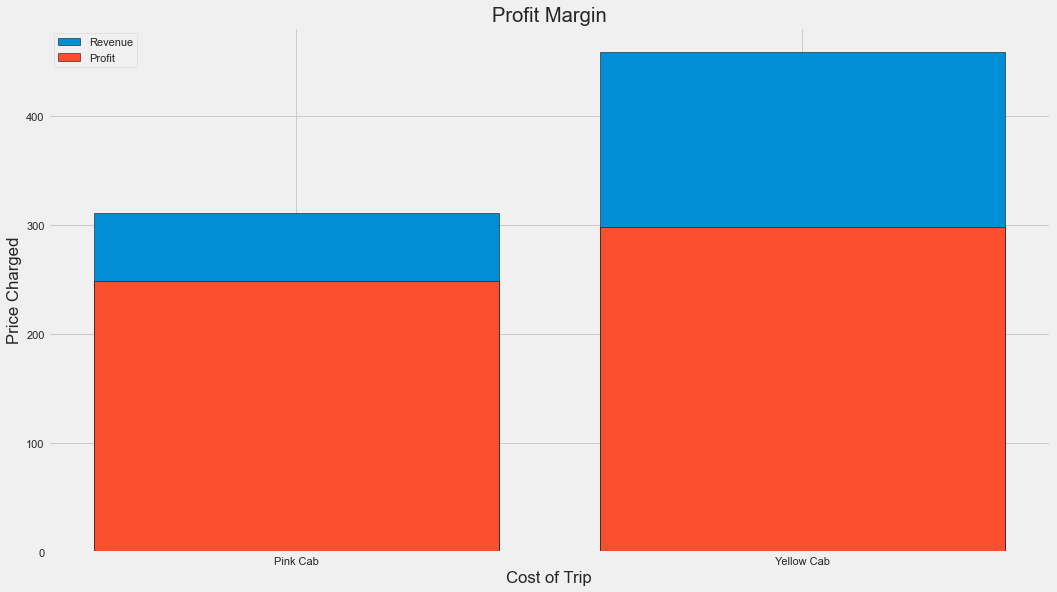

In [380]:
company = main_df.groupby('Company')
Revenue = company['Price Charged'].mean()
Profit = company['Cost of Trip'].mean()
Profit_index = Profit.index
Profit_val = Profit.values
Revenue_val = Revenue.values
x = (Revenue - Profit).round(2)
print('Profit Margin:\n',x)

plt.figure(figsize = (16, 9))
plt.bar(Profit_index, Revenue_val, edgecolor='black', label="Revenue")
plt.bar(Profit_index, Profit_val, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

Yellow cab has a higher Profit Margin with average of 160$ compared to Pink cab